### Data exploration

This notebook aims to explore some elements like missing description and missing wn_id from datasets.

In [60]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [61]:
cd ..

c:\Users\Matheus\Documents\Git


In [62]:
from src.utils import load_fb15k237, load_wn18rr, get_hist

PATH_FB15k237 = "data/datasets_knowledge_embedding/FB15k-237"
PATH_WN18RR = "data/datasets_knowledge_embedding/WN18RR/text"

In [63]:
train, valid, test, entity2wikidata = load_fb15k237(PATH_FB15k237)

FileNotFoundError: [Errno 2] No such file or directory: 'data/datasets_knowledge_embedding/FB15k-237/train.txt'

### FB15k237 Exploration

1 - Explore entities with missing description. \
2 - Plot histogram of entities and relations to avaliate the balance.

In [ ]:
import pandas as pd

all_data_fb = pd.concat([train, valid, test])

In [ ]:
all_data_fb.head()

,head,relation,tail
0,/m/027rn,/location/country/form_of_government,/m/06cx9
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8


In [ ]:
all_data_fb.shape

(310116, 3)

### Filtering only data with wikidata info

In [ ]:
df_entity = pd.DataFrame(entity2wikidata.keys(), columns=["head"])
all_data_fb_filtered = all_data_fb[
    all_data_fb["head"].isin(df_entity["head"])
    & all_data_fb["tail"].isin(df_entity["head"])
]

In [ ]:
all_data_fb_filtered.shape

(304205, 3)

In [ ]:
df_count = (
    all_data_fb_filtered[["head"]]
    .groupby(["head"], as_index=False)
    .value_counts()
    .sort_values(by="count", ascending=True)
)

df_count.head()

,head,count
9878,/m/09hz7t,1
10071,/m/09y2k2,1
10087,/m/0_2v,1
1501,/m/01gr00,1
1490,/m/01gln9,1


In [ ]:
df_count["count"].groupby(df_count["count"]).count()

count
1       672
2       487
3       461
4       498
5       549
       ... 
612       1
619       1
723       1
754       1
1517      1
Name: count, Length: 223, dtype: int64

Text(0.5, 0, 'Data')

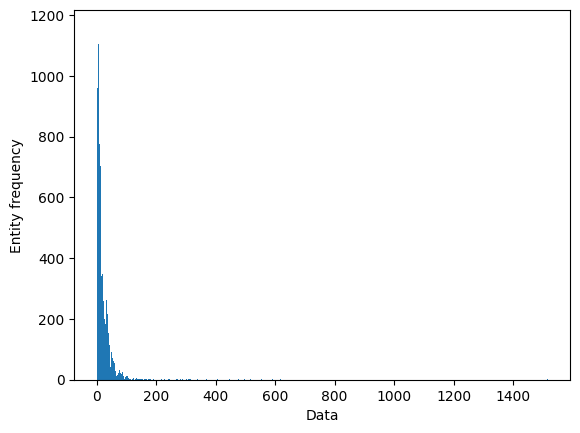

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(df_count["count"], bins=1000)
plt.ylabel("Entity frequency")
plt.xlabel("Data")

Freedman–Diaconis number of bins: 907


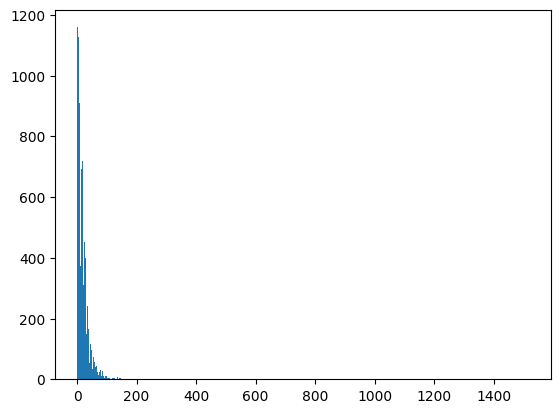

In [ ]:
# Friedman Diaconis Rule - https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
%matplotlib inline

import numpy as np

x = df_count["count"]

q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1 / 3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=bins)
plt.show()

Freedman-Diaconis number of bins: 907


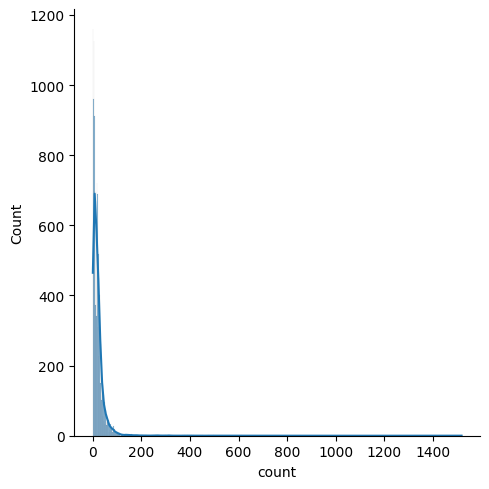

In [ ]:
get_hist(x)

### WN18RR Exploration

1 - Plot histogram of entities and relations to avaliate the balance.

In [ ]:
train, valid, test = load_wn18rr(PATH_WN18RR)
all_data_wn = pd.concat([train, valid, test])

In [ ]:
all_data_wn.head()

,head,relation,tail
0,land_reform.n.01,_hypernym,reform.n.01
1,cover.v.01,_derivationally_related_form,covering.n.02
2,botany.n.02,_derivationally_related_form,botanize.v.01
3,kamet.n.01,_instance_hypernym,mountain_peak.n.01
4,question.n.01,_derivationally_related_form,ask.v.01


In [ ]:
all_data_wn.shape

(93003, 3)

In [78]:
_df = (
    all_data_wn[["head"]]
    .groupby(["head"], as_index=False)
    .value_counts()
    .sort_values(by="count", ascending=True)
)

Freedman–Diaconis number of bins: 4245


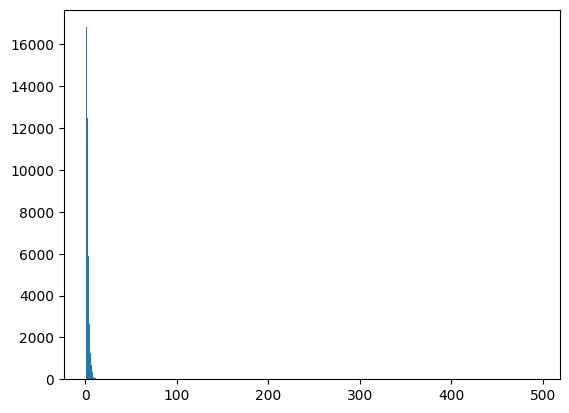

In [82]:
x = _df["count"]

q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1 / 3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
plt.hist(x, bins=500)
plt.show()

Freedman-Diaconis number of bins: 4245


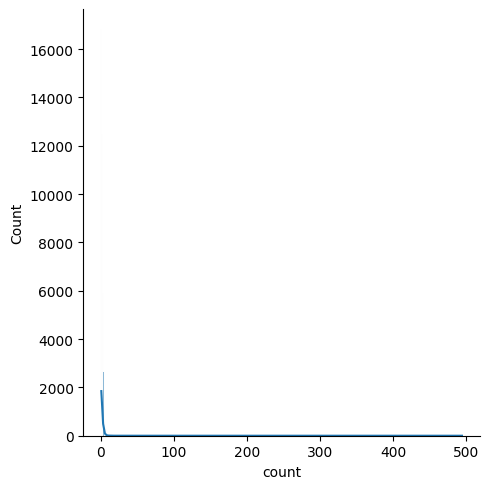

In [66]:
get_hist(
    all_data_wn[["head"]]
    .groupby(["head"], as_index=False)
    .value_counts()
    .sort_values(by="count", ascending=True)["count"],
)